In [2]:
# Keras integrates seamlessly with other Python libraries and tools commonly used in the machine learning ecosystem, such as scikit-learn, Pandas, NumPy, Matplotlib, and Jupyter notebooks
# from keras.models import Sequential
# from keras.layers import Dense
# Keras provides a simple and intuitive API that abstracts away much of the complexity of building neural networks
# Keras automatically utilizes GPU acceleration when available
# Keras seamlessly integrates with popular deep learning frameworks like TensorFlow, Theano, and CNTK.
# Keras is a high-level neural networks API written in Python, which runs on top of other deep learning frameworks such as TensorFlow, Theano, or Microsoft Cognitive Toolkit (CNTK).
# TensorFlow is a powerful open-source machine learning library developed by Google Brain for building and deploying machine learning models.
# TensorFlow is extensively used for building deep learning models, including convolutional neural networks (CNNs), recurrent neural networks (RNNs), long short-term memory networks (LSTMs), and more.
# These models are applied to tasks such as image classification, object detection, natural language processing (NLP), speech recognition, and time series forecasting.


In [7]:
# Tensor flow is a low level API written in C++ so it not very easy to code. It is most widely used ML and AI framework for deep learning
#Tensore flow is used for bigger and higher applications
# Bit difficult to debug but it has a higher community support
# Keras is not a full fludged Framework like pytorch and Tensorflow
# Keras is a wrapper around Tenosr flow, pytorch which make implemetation easy since it is a high level language
# In recent version Keras was inbuilt into tensorflow


In [43]:

from tensorflow import keras
from keras.datasets import cifar10

# Load the pres-shuffled train and test data. THe data has two inbuild data of train and test
(x_train,y_train),(x_test,y_test)=cifar10.load_data()


In [44]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

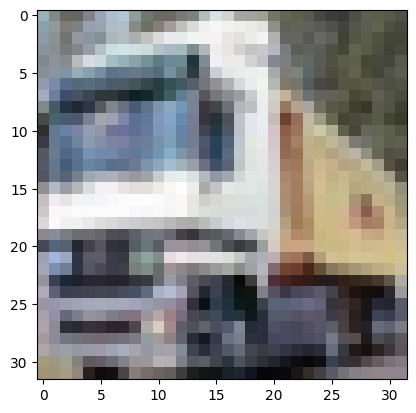

In [46]:
# plt.imshow(np.squeeze(x_train[1])) imshow is used to show the image

plt.imshow(np.squeeze(x_train[1]))

In [47]:
 # Tf the images are stored as a 4D array (e.g., (batch_size, height, width, channels)), but you want to plot a single image which would be represented as a 3D array
  #(e.g., (height, width, channels)), np.squeeze(...) is used to remove the extra batch dimension

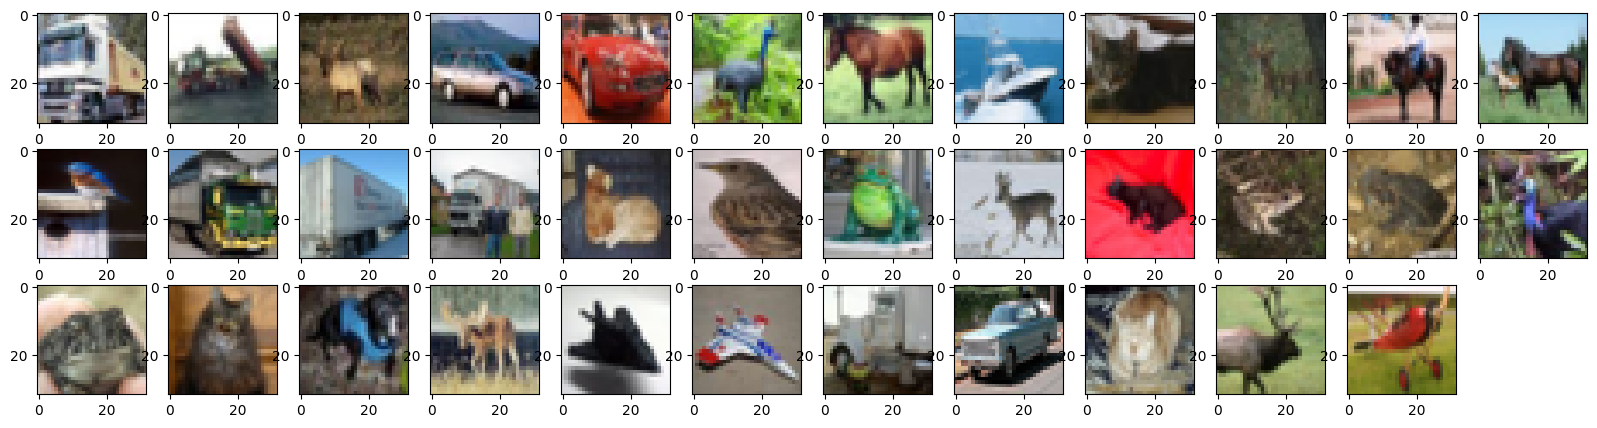

In [48]:
fig=plt.figure(figsize=(20,5))
for i in range (1,36):
  ax=fig.add_subplot(3,12,i)
  ax.imshow(np.squeeze(x_train[i]))


In [49]:
# Scaling the data by dividing everything by 255 to get in the range of 0-255
x_train.shape
# Here 5000 is the batchsize
# 32 is the height of the image
# 32 is the width of the image
# 3 referes to color image in a RGB scale , 1 means grey scale image

(50000, 32, 32, 3)

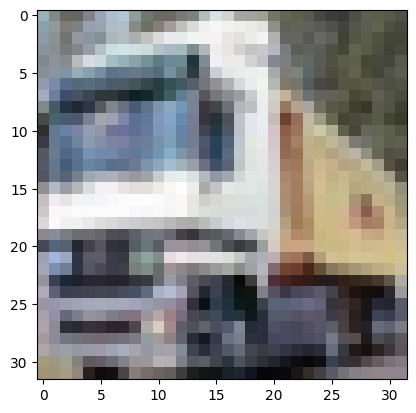

In [50]:
x_check=plt.imshow(x_train[1])

In [51]:
x_train.dtype
# This Data type is used for image data. The numbers range from 0 to 255

dtype('uint8')

In [52]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [53]:
## Break Dataset into Training, Testing and Validating Dataset

In [54]:
# from keras.utils import to_categorical
from keras.utils import to_categorical
from tensorflow import keras



# One-Hot encoding of the lable Data

In [55]:
# one-hot encoding the labels
num_calsses=len(np.unique(y_train))
y_train=keras.utils.to_categorical(y_train,num_calsses)
y_test=keras.utils.to_categorical(y_test,num_calsses)

# Splitting Data into Train and Validation Dataset

In [56]:
# Breaking training data into training and Validation sets
x_train,x_valid=x_train[5000:],x_train[:5000]
y_train,y_valid=y_train[5000:],y_train[:5000]

# Printing the shape of training data
print(x_train.shape,x_valid.shape)

(45000, 32, 32, 3) (5000, 32, 32, 3)


# Defining the Model architecture

In [61]:
# Sequential is the name given to convolutional nueural network with in Keras library
# Padding =same means the padded layer will take the values from the nearby
# Pool size 2 means a 2*2 matrix. The pooling will reduce the matrix by 1/4
# Dropout of 0.3 means 30 % of data will be dropped. Randomly we will select 70 % of data (30% of neurons are dropped to prevent overfitting)
# The Flatten layer is used to convert the multi-dimensional output of the previous layer into a one-dimensional vector
# 500: This parameter specifies the number of neurons (units) in the Dense layer. In this case, there are 500 neurons in the layer.
# It can be 50* 10 =500 Neurons in total
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))
# Finally there are 10 classes so we are using giving 10 classes
# Since it is a multi calss we are using softmax here
model.summary()

# Here 208 indicate the total number of weights and Bias in the Convolution layer


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 64)         

# Compile the Model

In [62]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# loss='categorical_crossentropy' it is used for categorical data and it is also called the log loss function
# optimizer='rmsprop': It is root mean square propogation. We can use others like adam,gradinet descent
# Since this is calssification we can have accuracy or f1_score etc



In [63]:
x_train.shape

(45000, 32, 32, 3)

# Training the Model

In [87]:
from keras.callbacks import ModelCheckpoint
# Callbacks in Keras are functions that can be applied during the training process to perform certain actions at specific points. The ModelCheckpoint callback, in particular, is used to save the model's weights during training
checkpointer=ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=3,save_best_only=True)

# The extension .hdf5 indicates that the weights will be saved in HDF5 format, which is commonly used for saving Keras models.
# save_best_only: If True, it saves only the model weights that result in the highest monitored metric
# Train the Model
# One cycle of going thoough all the layers is called epoch

hist=model.fit(x_train,y_train,batch_size=32,epochs=10,
               validation_data=(x_valid,y_valid),callbacks=[checkpointer],
               verbose=3,shuffle=True)



Epoch 1/10

Epoch 1: val_loss improved from inf to 1.15544, saving model to model.weights.best.hdf5
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.15544 to 1.10336, saving model to model.weights.best.hdf5
Epoch 3/10

Epoch 3: val_loss improved from 1.10336 to 1.02564, saving model to model.weights.best.hdf5
Epoch 4/10

Epoch 4: val_loss improved from 1.02564 to 0.97966, saving model to model.weights.best.hdf5
Epoch 5/10

Epoch 5: val_loss improved from 0.97966 to 0.93741, saving model to model.weights.best.hdf5
Epoch 6/10

Epoch 6: val_loss improved from 0.93741 to 0.92397, saving model to model.weights.best.hdf5
Epoch 7/10

Epoch 7: val_loss did not improve from 0.92397
Epoch 8/10

Epoch 8: val_loss did not improve from 0.92397
Epoch 9/10

Epoch 9: val_loss did not improve from 0.92397
Epoch 10/10

Epoch 10: val_loss did not improve from 0.92397


# 8. Load the Model with the Best Validation accuracy




In [88]:
model.load_weights('model.weights.best.hdf5')

# 9. Visualize Some predictions

In [89]:
y_hat=model.predict(x_test)
# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 4s 12ms/step


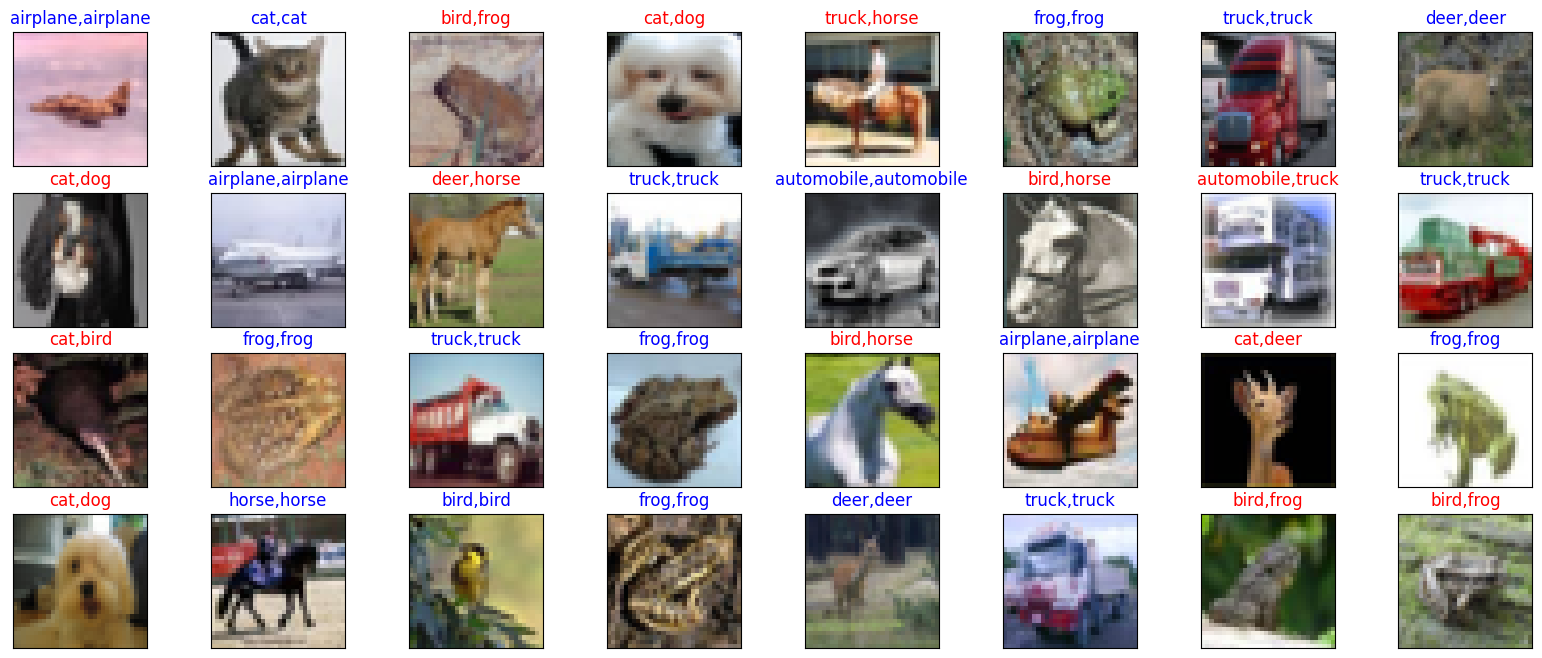

In [90]:
# Plot a random sample of test images, their predicted labels and ground truth
fig=plt.figure(figsize=(20,8))
# This line of code randomly selects 32 indices from the test dataset (x_test)
# replace=False ensures that the selected indices are unique and not replaced
for i,idx in enumerate(np.random.choice(x_test.shape[0],size=32,replace=False)):
  ax=fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_test[idx]))
  pred_idx=np.argmax(y_hat[idx])
  true_idx=np.argmax(y_test[idx])
  ax.set_title(f'{cifar10_labels[pred_idx]},{cifar10_labels[true_idx]}',
               color=('blue' if pred_idx==true_idx else "red"))



In [91]:
# Evaluate the test acucuracy
score=model.evaluate(x_test,y_test,verbose=0)
accuracy=100*score[1]

In [92]:
accuracy

67.1500027179718

In [84]:
testing=100*score
testing[0:5]

[1.569564938545227,
 0.4178999960422516,
 1.569564938545227,
 0.4178999960422516,
 1.569564938545227]

In [93]:
import tensorflow as tf
img=keras.preprocessing.image.load_img('inputimage.png',target_size=(32,32,3))
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0) # Create batch axis

predictions=model.predict(img_array)
score=predictions
score

1/1 [==============================] - 0s 22ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [94]:
cifar10_labels[np.argmax(score)]

'airplane'